## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
movies=pd.read_csv('movies_cleaned.csv')

In [3]:
movies.head()

,color,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,language,content_rating,title_year,...,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Year,GDP Growth Rate
0,Color,178.0,0.0,855.0,1000.0,4834,0.0,English,PG-13,2009.0,...,0,0,0,1,0,0,0,0,2009,-2.5
1,Color,150.0,0.0,464.0,894.0,3218,0.0,English,PG-13,2009.0,...,0,0,0,1,0,0,0,0,2009,-2.5
2,Color,118.0,368.0,988.0,23000.0,27468,0.0,English,PG-13,2009.0,...,0,0,0,1,0,0,0,0,2009,-2.5
3,Color,158.0,776.0,310.0,1000.0,2144,0.0,English,PG-13,2009.0,...,0,0,0,1,0,0,0,0,2009,-2.5
4,Color,96.0,0.0,10000.0,18000.0,48878,0.0,English,PG,2009.0,...,0,0,0,0,0,0,0,0,2009,-2.5


## One Hot Encoding

In [4]:
encoder = ce.OneHotEncoder(cols=['color','language','content_rating'],use_cat_names=True)

In [5]:
movies=encoder.fit_transform(movies)

In [6]:
movies.head()

,color_Color,color_ Black and White,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,language_English,language_Dari,...,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Year,GDP Growth Rate
0,1,0,178.0,0.0,855.0,1000.0,4834,0.0,1,0,...,0,0,0,1,0,0,0,0,2009,-2.5
1,1,0,150.0,0.0,464.0,894.0,3218,0.0,1,0,...,0,0,0,1,0,0,0,0,2009,-2.5
2,1,0,118.0,368.0,988.0,23000.0,27468,0.0,1,0,...,0,0,0,1,0,0,0,0,2009,-2.5
3,1,0,158.0,776.0,310.0,1000.0,2144,0.0,1,0,...,0,0,0,1,0,0,0,0,2009,-2.5
4,1,0,96.0,0.0,10000.0,18000.0,48878,0.0,1,0,...,0,0,0,0,0,0,0,0,2009,-2.5


In [7]:
encoder.get_feature_names()

['color_Color',
 'color_ Black and White',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'language_English',
 'language_Dari',
 'language_Spanish',
 'language_Maya',
 'language_Japanese',
 'language_Vietnamese',
 'language_Bosnian',
 'language_None',
 'language_Aramaic',
 'language_Filipino',
 'content_rating_PG-13',
 'content_rating_PG',
 'content_rating_R',
 'content_rating_G',
 'content_rating_Unrated',
 'content_rating_Not Rated',
 'content_rating_NC-17',
 'content_rating_X',
 'content_rating_Approved',
 'content_rating_M',
 'content_rating_Passed',
 'title_year',
 'actor_2_facebook_likes',
 'aspect_ratio',
 'inf_adj_budget',
 'inf_adj_gross',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Musical',
 'Music',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Wes

In [8]:
#movies.pop('title_year')
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
color_Color,2996.0,9.712951e-01,1.670038e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
color_ Black and White,2996.0,2.870494e-02,1.670038e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
duration,2996.0,1.096629e+02,2.213576e+01,37.000000,9.500000e+01,1.060000e+02,1.190000e+02,3.300000e+02
director_facebook_likes,2996.0,9.245567e+02,3.359015e+03,0.000000,1.100000e+01,6.400000e+01,2.430000e+02,2.300000e+04
actor_3_facebook_likes,2996.0,8.438999e+02,2.013989e+03,0.000000,2.337500e+02,4.720000e+02,7.242500e+02,2.300000e+04
actor_1_facebook_likes,2996.0,8.302201e+03,1.677869e+04,0.000000,8.195000e+02,2.000000e+03,1.300000e+04,6.400000e+05
cast_total_facebook_likes,2996.0,1.243552e+04,2.051166e+04,0.000000,2.250250e+03,4.614000e+03,1.694500e+04,6.567300e+05
facenumber_in_poster,2996.0,1.414219e+00,2.128349e+00,0.000000,0.000000e+00,1.000000e+00,2.000000e+00,4.300000e+01
language_English,2996.0,9.953271e-01,6.821007e-02,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
language_Dari,2996.0,3.337784e-04,1.826960e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [9]:
movies.pop('title_year')

0       2009.0
1       2009.0
2       2009.0
3       2009.0
4       2009.0
         ...  
2991    1937.0
2992    1954.0
2993    1935.0
2994    1933.0
2995    1929.0
Name: title_year, Length: 2996, dtype: float64

## Modeling

### Random Forest Default

In [10]:
X_train, X_test, y_train, y_test = train_test_split(movies.drop(columns={'inf_adj_gross'}), 
                                                        movies.inf_adj_gross, test_size=0.3,random_state=12)

0.4058736517419753


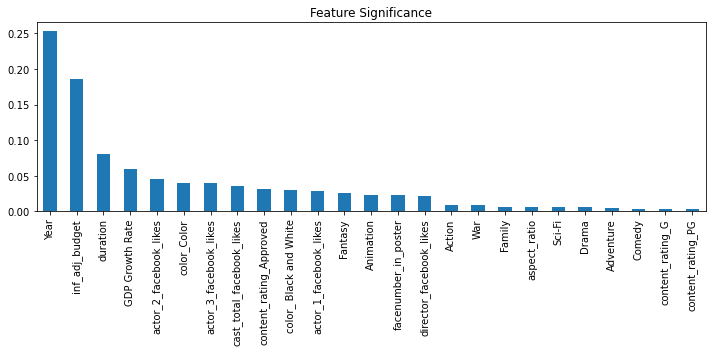

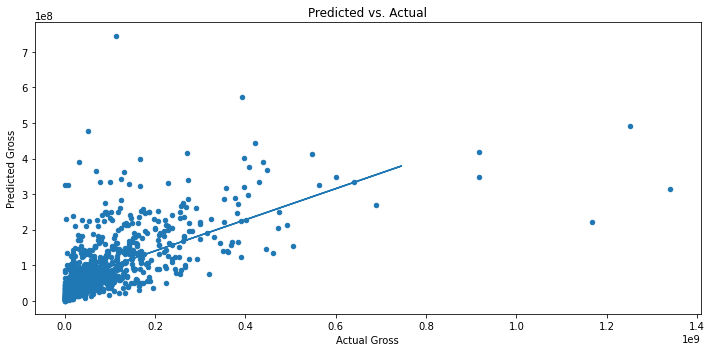

In [11]:
RFR=RandomForestRegressor(random_state=12)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)
y_pred = pd.Series(y_pred)
coef = pd.Series(RFR.feature_importances_, index = X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Gross')
plt.ylabel('Predicted Gross')
m,b= np.polyfit(y_test, y_pred, 1)
plt.plot(y_pred,m*y_pred+b)
plt.tight_layout()
print(RFR.score(X_test,y_test))

In [12]:
print(np.mean(movies.inf_adj_gross))
print(mean_absolute_error(y_pred,y_test))

89985722.43940952
52931342.23652675


R-Squared score is pretty low, and MAE seems too high.

### Random Forest Random Search CV

In [13]:
X_train, X_test, y_train, y_test = train_test_split(movies.drop(columns={'inf_adj_gross'}), 
                                                        movies.inf_adj_gross, test_size=0.3, 
                                                        random_state=10)

In [14]:
n_estimators = [10,25,50,100]
max_features = ['auto', 'sqrt']
criterion=['mae','mse']
max_depth = [5,10,15]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [15]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [16]:
rfr = RandomForestRegressor(random_state=12)
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,n_iter=20,cv = 3, verbose=2, random_state=12,n_jobs=-1)
rfr_random.fit(X_train, y_train)
rfr_random.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   24.6s finished


{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 5,
 'criterion': 'mse',
 'bootstrap': True}

In [17]:
rfr_best=rfr_random.best_estimator_

In [18]:
y_pred = rfr_best.predict(X_test)
y_pred = pd.Series(y_pred)
print(mean_absolute_error(y_pred,y_test))
print(rfr_best.score(X_test,y_test))
print(rfr_best.score(X_train,y_train))

55170092.61465412
0.4425131929707242
0.6986896434474834


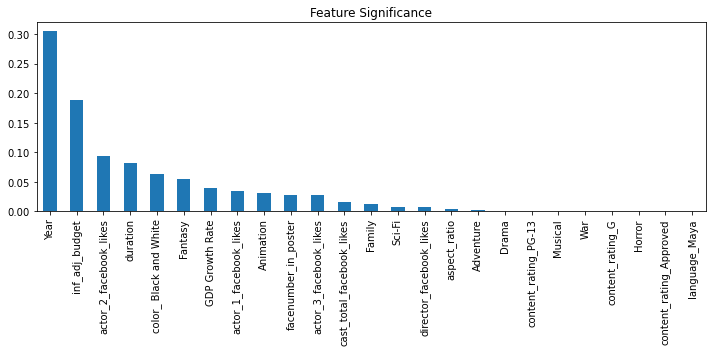

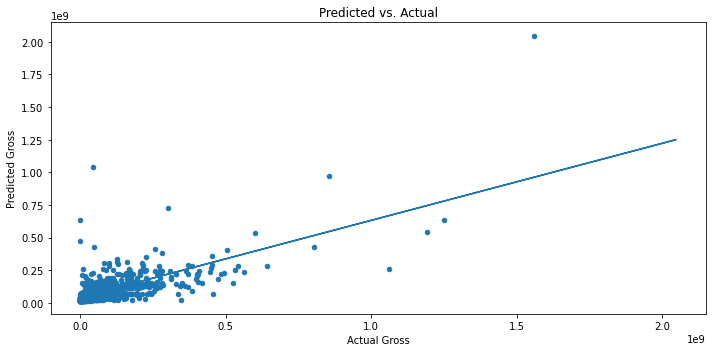

In [19]:
coef = pd.Series(rfr_best.feature_importances_, index = X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Gross')
plt.ylabel('Predicted Gross')
m,b= np.polyfit(y_test, y_pred, 1)
plt.plot(y_pred,m*y_pred+b)
plt.tight_layout()

R-squared went up a little, and the model is not overfitting as much, but there are still much room for improvement

In [20]:
#predict all the gross using the model we fit above
pred_all=rfr_best.predict(movies.drop(columns={'inf_adj_gross'}))
movies['prediction']=pred_all


In [21]:
#Find extreme outliers
movies[np.abs(movies['prediction']-movies['inf_adj_gross'])>100*movies['inf_adj_gross']]

,color_Color,color_ Black and White,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,language_English,language_Dari,...,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Year,GDP Growth Rate,prediction
75,1,0,111.0,214.0,3000.0,10000.0,23566,2.0,1,0,...,0,0,0,0,0,0,0,2009,-2.5,5.963876e+07
112,1,0,91.0,7.0,875.0,12000.0,16118,2.0,1,0,...,0,0,0,0,0,0,0,2009,-2.5,2.501317e+07
113,1,0,90.0,0.0,617.0,806.0,3124,2.0,1,0,...,0,1,0,0,0,0,0,2009,-2.5,2.295635e+07
114,1,0,90.0,8.0,495.0,1000.0,3146,1.0,1,0,...,0,0,0,0,0,0,0,2009,-2.5,1.850034e+07
126,1,0,105.0,38.0,706.0,12000.0,14462,0.0,1,0,...,0,1,0,0,0,1,0,2009,-2.5,1.850034e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,0,1,121.0,17000.0,356.0,22000.0,23008,1.0,1,0,...,0,0,0,1,0,0,0,1980,-0.3,2.887835e+08
2897,1,0,112.0,17000.0,354.0,22000.0,23737,0.0,1,0,...,0,1,0,0,1,0,0,1973,5.6,6.322917e+08
2959,1,0,152.0,541.0,288.0,773.0,2888,2.0,1,0,...,0,0,0,0,0,1,1,1965,6.5,4.753126e+08
2989,0,1,92.0,0.0,18.0,1000.0,1055,1.0,1,0,...,1,0,0,0,1,0,0,1947,-1.1,7.809136e+07


In [22]:
movies.iloc[[75]][['inf_adj_gross','inf_adj_budget']]

,inf_adj_gross,inf_adj_budget
75,68391.527858,3.015925e+07


There are 113 heavy outliers as a sample shown above, remove them to increase predicatability.

In [23]:
no_outlier_movies=movies[np.abs(movies['prediction']-movies['inf_adj_gross'])<100*movies['inf_adj_gross']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(no_outlier_movies.drop(columns={'inf_adj_gross','prediction'}), 
                                                        no_outlier_movies.inf_adj_gross, test_size=0.3, 
                                                        random_state=12)
y_pred=rfr_best.predict(X_test)
print(rfr_best.score(X_test,y_test))
print(rfr_best.score(X_train,y_train))
print(mean_absolute_error(y_pred,y_test))

0.6928519163234463
0.6405784373382275
50115460.05257148


R-squared score on the test set and on the training set indicate that the model is not overfitting, and the score went up marginally as well.

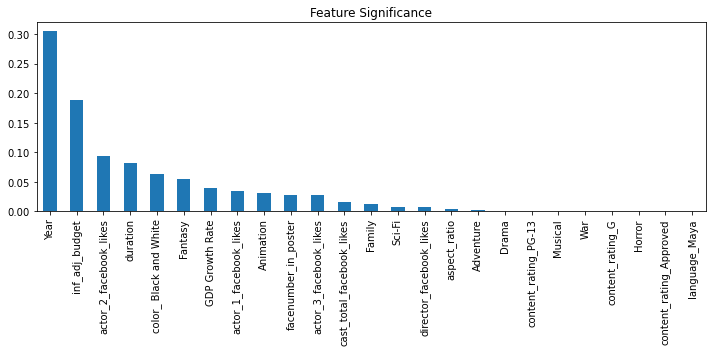

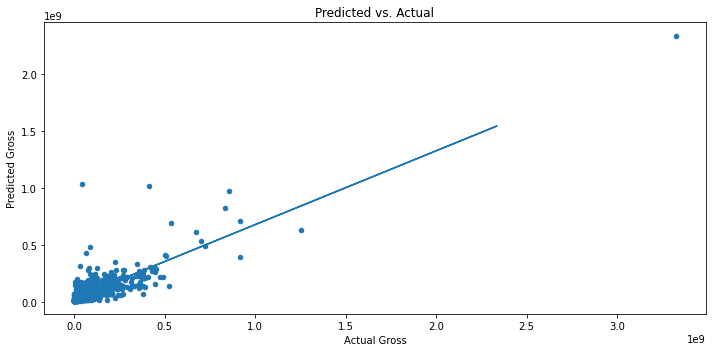

In [25]:
coef = pd.Series(rfr_best.feature_importances_, index = X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Gross')
plt.ylabel('Predicted Gross')
m,b= np.polyfit(y_test, y_pred, 1)
plt.plot(y_pred,m*y_pred+b)
plt.tight_layout()

## Modifying Dataset to Increase Predictive Power

In [26]:
movies.pop('prediction')

0       3.967903e+08
1       2.206315e+08
2       2.537449e+08
3       2.206315e+08
4       2.477048e+08
            ...     
2991    2.337415e+09
2992    2.843115e+08
2993    3.920760e+08
2994    7.218927e+08
2995    1.038761e+09
Name: prediction, Length: 2996, dtype: float64

In [27]:
new_df=movies.drop(columns={'actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','director_facebook_likes','cast_total_facebook_likes'})
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(columns={'inf_adj_gross'}),new_df.inf_adj_gross, test_size = 0.25, random_state = 12)

0.2773470122536521
0.9145219365272496
57714007.30205765


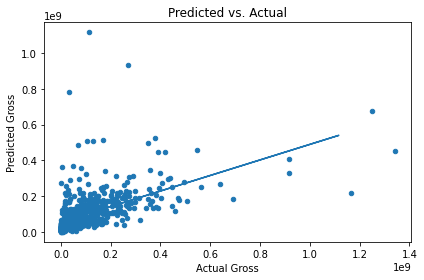

In [28]:
RFRM=RandomForestRegressor(random_state=12,criterion='mae')
RFRM.fit(X_train,y_train)
y_pred = RFRM.predict(X_test)
y_pred = pd.Series(y_pred)
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Gross')
plt.ylabel('Predicted Gross')
m,b= np.polyfit(y_test, y_pred, 1)
plt.plot(y_pred,m*y_pred+b)
plt.tight_layout()
print(RFRM.score(X_test,y_test))
print(RFRM.score(X_train,y_train))
print(mean_absolute_error(y_pred,y_test))

Features regarding number of facebook likes were removed since actors and directors from the past would be put at disadvantage (because they are likelier to be less known these days); but looking at the fact that the score is lower than our default model, it seems like these features were actually helpful. 

In [29]:
#bring back imdb score data from original dataset
orig_movies=pd.read_csv('movie_metadata.csv')
movies['imdb_rating']=0.0
listo=[]
for i in range(len(movies)):
    yes=(movies.duration[i],movies.actor_1_facebook_likes[i],movies.actor_2_facebook_likes[i],movies.director_facebook_likes[i])
    listo.append(yes)
for val in listo:
    for i in range(len(orig_movies)):
        if (val[0]==orig_movies.duration[i]) and (val[1]==orig_movies.actor_1_facebook_likes[i]) and (val[2]==orig_movies.actor_2_facebook_likes[i]) and (val[3]==orig_movies.director_facebook_likes[i]):
            movies.imdb_rating[listo.index(val)]=orig_movies.imdb_score[i]

<ipython-input-29-481cfa339d8e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.imdb_rating[listo.index(val)]=orig_movies.imdb_score[i]


In [30]:
movies.imdb_rating

0       7.9
1       6.0
2       6.6
3       5.8
4       6.8
       ... 
2991    7.7
2992    8.2
2993    7.8
2994    7.7
2995    6.3
Name: imdb_rating, Length: 2996, dtype: float64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(movies.drop(columns={'inf_adj_gross'}), 
                                                        movies.inf_adj_gross, test_size=0.3, 
                                                        random_state=12)

In [32]:
#movies.pop('new_predictions')

In [33]:
rfr = RandomForestRegressor(random_state=12)
rfr_random2 = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,n_iter=20,cv = 3, verbose=2, random_state=12,n_jobs=-1)
rfr_random2.fit(X_train, y_train)
rfr_random2.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:   14.0s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   32.5s finished


{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'mae',
 'bootstrap': True}

In [34]:
rfr_best2=rfr_random2.best_estimator_

In [35]:
pred_all2=rfr_best2.predict(movies.drop(columns={'inf_adj_gross'}))
movies['new_predictions']=pred_all2

In [36]:
movies[['inf_adj_gross','new_predictions']].sample(10)

,inf_adj_gross,new_predictions
1116,1.179529e+08,1.261811e+08
1272,5.745038e+06,7.122013e+07
843,1.472617e+08,1.577243e+08
803,1.004667e+07,2.135852e+07
2178,1.111475e+08,1.110806e+08
2984,3.698861e+09,8.601623e+08
2517,1.735967e+08,2.096743e+08
2429,5.674143e+07,4.419335e+07
983,1.720792e+08,1.129466e+08
2013,1.228103e+08,1.606499e+08


In [37]:
#get rid of heavy outliers again
no_outlier_movies=movies[np.abs(movies['new_predictions']-movies['inf_adj_gross'])<100*movies['inf_adj_gross']]
movies[np.abs(movies['new_predictions']-movies['inf_adj_gross'])>100*movies['inf_adj_gross']]

,color_Color,color_ Black and White,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,language_English,language_Dari,...,Romance,Sci-Fi,Sport,Thriller,War,Western,Year,GDP Growth Rate,imdb_rating,new_predictions
75,1,0,111.0,214.0,3000.0,10000.0,23566,2.0,1,0,...,0,0,0,0,0,0,2009,-2.5,7.3,4.582927e+07
112,1,0,91.0,7.0,875.0,12000.0,16118,2.0,1,0,...,0,0,0,0,0,0,2009,-2.5,5.5,1.495754e+07
114,1,0,90.0,8.0,495.0,1000.0,3146,1.0,1,0,...,0,0,0,0,0,0,2009,-2.5,4.7,1.312391e+07
131,1,0,104.0,0.0,329.0,14000.0,15860,1.0,1,0,...,0,0,0,1,0,0,2009,-2.5,5.9,2.819003e+07
132,1,0,90.0,0.0,231.0,648.0,1951,0.0,1,0,...,0,0,0,0,0,0,2009,-2.5,5.0,2.472023e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,0,1,121.0,17000.0,356.0,22000.0,23008,1.0,1,0,...,0,0,1,0,0,0,1980,-0.3,8.3,3.488042e+08
2897,1,0,112.0,17000.0,354.0,22000.0,23737,0.0,1,0,...,1,0,0,1,0,0,1973,5.6,7.4,1.801561e+08
2959,1,0,152.0,541.0,288.0,773.0,2888,2.0,1,0,...,0,0,0,0,1,1,1965,6.5,6.8,3.612702e+08
2989,0,1,92.0,0.0,18.0,1000.0,1055,1.0,1,0,...,0,0,0,1,0,0,1947,-1.1,7.7,3.362508e+08


In [38]:
#new split without the 62 outliers
X_train, X_test, y_train, y_test = train_test_split(no_outlier_movies.drop(columns={'inf_adj_gross','new_predictions'}), 
                                                        no_outlier_movies.inf_adj_gross, test_size=0.3, 
                                                        random_state=20)

In [39]:
y_pred = rfr_best2.predict(X_test)
y_pred = pd.Series(y_pred)
print(mean_absolute_error(y_pred,y_test))
print(rfr_best2.score(X_test,y_test))
print(rfr_best2.score(X_train,y_train))

38784109.047626756
0.570033241346886
0.5716958908391095


The test score and the training scores are a bit low; but the model is not overfitting and MAE went down significantly. 

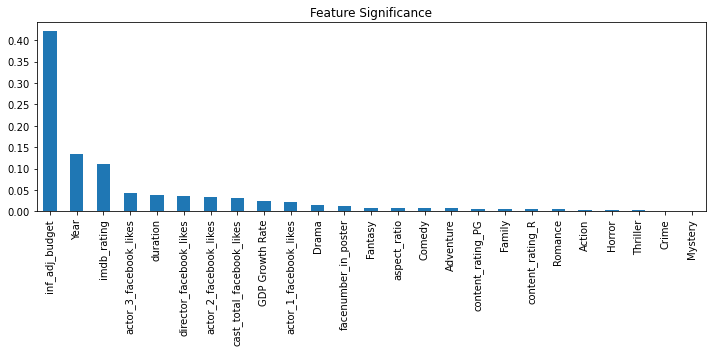

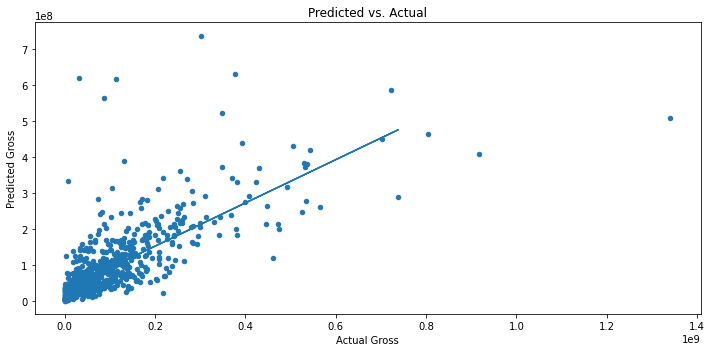

In [40]:
coef = pd.Series(rfr_best2.feature_importances_, index = X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Gross')
plt.ylabel('Predicted Gross')
m,b= np.polyfit(y_test, y_pred, 1)
plt.plot(y_pred,m*y_pred+b)
plt.tight_layout()

## Extreme Gradient Boosting with Bayesian Hyperparamter Optimization

In [41]:
import xgboost as xgb
from skopt import BayesSearchCV

In [42]:
XGBR2 = xgb.XGBRegressor(random_state=12)
XGBR2.fit(X_train,y_train)
opt = BayesSearchCV(XGBR2,{"n_estimators":[i for i in range(10,150)],
                              "max_depth":[i for i in range(3,30)],'reg_lambda':[1,2]},n_iter=25,cv=5)
opt.fit(X_train, y_train)
yp = XGBR2.predict(X_test)
print(XGBR2.score(X_test,y_test))
print(XGBR2.score(X_train,y_train))

C:\Users\juang\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\juang\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\juang\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\juang\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\juang\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\juang\

0.37098889247625566
0.9955648407472792


In [43]:
print(mean_absolute_error(y_pred,y_test))

38784109.047626756


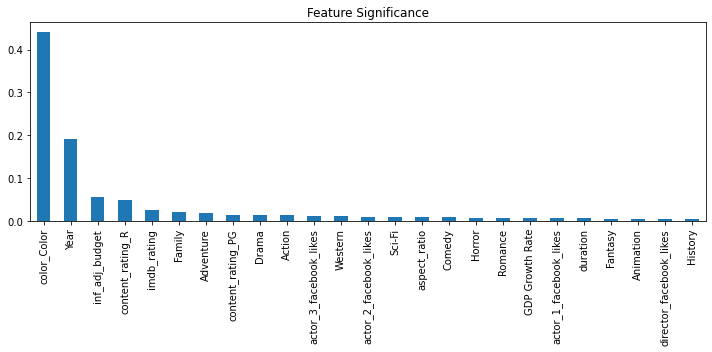

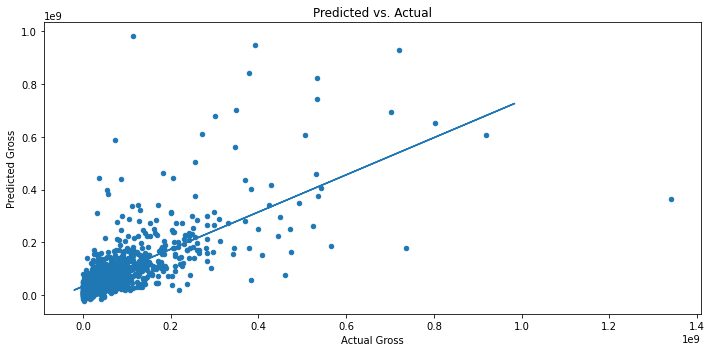

In [44]:
y_pred = XGBR2.predict(X_test)
y_pred = pd.Series(y_pred)
coef = pd.Series(XGBR2.feature_importances_, index = X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Gross')
plt.ylabel('Predicted Gross')
m,b= np.polyfit(y_test, y_pred, 1)
plt.plot(y_pred,m*y_pred+b)
plt.tight_layout()

The model is clearly overfitting and the feature importance graph shows that it is using Color as the most important feature, which is not very convincing.

In [45]:
import os
import pickle
import datetime
from sklearn import __version__ as sklearn_version

In [47]:
best_model = rfr_best2
filename = 'finalized_model.sav'
pickle.dump(best_model, open(filename, 'wb'))